In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from numpy.linalg import norm

In [2]:
# Load dataset
df = pd.read_csv("songs.csv", encoding="latin-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Display basic statistics
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
# Dispaly null counts
df.isnull().sum() 

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
# Display types of each column
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:
# Select the numeric features describing audio features
feature_cols = [
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%"
]

# Drop rows with missing values in these columns
df_features = df.dropna(subset=feature_cols).copy()

# Store all the selected feature columns as a numpy array
X = df_features[feature_cols].values
print("Shape of X:", X.shape)


Shape of X: (953, 8)


Text(0.5, 9.444444444444438, 'Value')

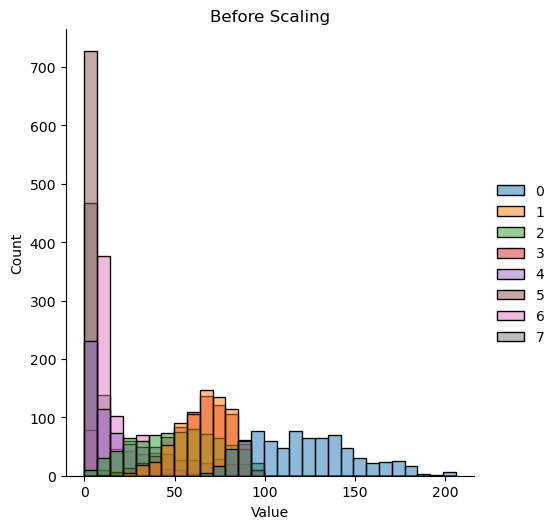

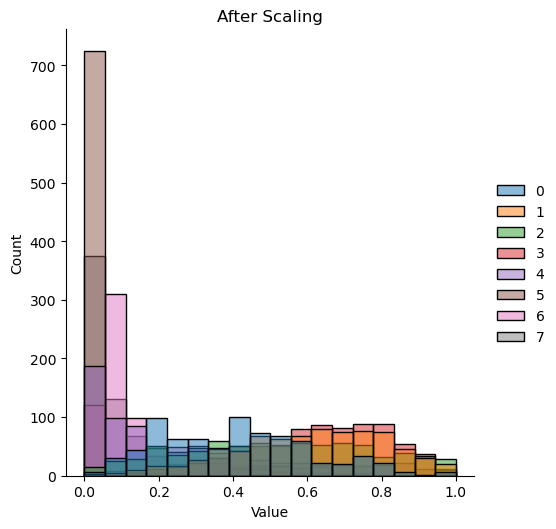

In [7]:
# Train test split
# Since it is an autoencoder, there is no y since the 'label' is x itself
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale for the features to be between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_train)

# Scale the train and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the train data before scaling
sns.displot(X_train)
plt.title("Before Scaling")
plt.xlabel("Value")

# Visualize the train data after scaling
sns.displot(X_train_scaled)
plt.title("After Scaling")
plt.xlabel("Value")

In [8]:
# Create a neural network model (autoencoder)

# Hidden layer sizes:
#   - first hidden layer: 16 units
#   - second hidden layer: 8 units  (bottleneck - embedding layer)
#   - third hidden layer: 16 units
#
# Activation function for hiddne layers: tanh
#
# Optimizaiton: adam
#
# Epochs: 200

mlp = MLPRegressor(
    hidden_layer_sizes=(16, 8, 16),
    activation='tanh',   
    solver='adam',       
    max_iter=200,
    random_state=42
)

# Fit the model (since this is an autoencoder, we are trying to reconstruct the input)
mlp.fit(X_train_scaled, X_train_scaled)


MLPRegressor(activation='tanh', hidden_layer_sizes=(16, 8, 16), random_state=42)

In [9]:
# Predict on test data
X_test_recon = mlp.predict(X_test_scaled)

# Compute MSE loss function on the evaluation of the trained model
mse = mean_squared_error(X_test_scaled, X_test_recon)
print(f"Test reconstruction MSE: {mse:.6f}")


Test reconstruction MSE: 0.016325


We manually reconstructed the forward pass of the autoencoder to extract the values of the bottleneck layer, which serve as the 8-dimensional song embeddings. These embeddings are used for similarity calculations and form the basis of our recommendation system.

In [10]:
# Manual implementation of tanh since sklearn doesn't give the hidden layers activation directly
def tanh(x):
    return np.tanh(x)

# Extract the embeddings (activations of the bottleneck/second hidden layer)
def get_embeddings(mlp, X_scaled):
    
    # Extract the weights and biases of each layer (4 layers: 3 hidden layers + 1 output layer)
    W0, W1, W2, W3 = mlp.coefs_       
    b0, b1, b2, b3 = mlp.intercepts_  

    # Compute activation of hidden layer 1
    h1 = tanh(X_scaled @ W0 + b0)

    # Compute activiation of hidden layer 2 (this is the one we care about)
    h2 = tanh(h1 @ W1 + b1)

    return h2

# Compute embeddings for all songs in df_features
X_scaled_all = scaler.transform(X) 
song_embeddings = get_embeddings(mlp, X_scaled_all)

print("Embedding shape:", song_embeddings.shape)


Embedding shape: (953, 8)


In [11]:
# The song embeddings
pd.DataFrame(song_embeddings).head()

,0,1,2,3,4,5,6,7
0,-0.587159,0.820107,0.106505,-0.342867,-0.274731,0.207251,0.024579,-0.691654
1,-0.292217,0.741882,-0.042248,-0.340713,-0.157386,0.270486,0.065897,-0.513385
2,-0.549697,0.586184,-0.032179,-0.093745,0.160848,0.074522,-0.044482,-0.519319
3,-0.620808,0.683932,-0.057711,-0.226820,-0.148111,0.006499,-0.045680,-0.679451
4,-0.514403,0.476870,0.057828,-0.287535,-0.077634,0.170287,-0.068328,-0.462896


To generate recommendations, we first embed every song using the bottleneck layer of the autoencoder. Given a query song, we look up its 4-dimensional embedding and compute the cosine similarity between that vector and the embeddings of all other songs. We then rank songs by similarity and return the top-N most similar tracks (excluding the query song itself). This treats recommendation as a nearest-neighbour search in the learned embedding space.

In [12]:
# Function to recommend 5 songs based on a given qeury song
def recommend_songs(query_title, n_recs):
    
    # Making the track name search case insensitive 
    mask = df_features["track_name"].str.lower() == query_title.lower()
    
    # If the track name is not found in the dataset, return nothing
    if not mask.any():
        print(f"Song '{query_title}' not found in dataset.")
        return

    # Finds the index where the song is located in the array
    query_idx = np.where(mask)[0][0]

    # Gets the 8 dimensional embedding for the query track
    query_vec = song_embeddings[query_idx]

    # Computes cosine similarity between query song and all others
    sims = song_embeddings @ query_vec / (norm(song_embeddings, axis=1) * norm(query_vec) + 1e-8)

    # Sort songs by similarity (descending)
    sorted_idx = np.argsort(sims)[::-1]

    # Get the recommendations based on the cosine similiary 
    recs = []
    for idx in sorted_idx:
        if idx == query_idx:
            continue  
        recs.append((idx, sims[idx]))
        if len(recs) >= n_recs:
            break

    # Print the results
    print(f"\nRecommendations for: {df_features.iloc[query_idx]['track_name']} - {df_features.iloc[query_idx]['artist(s)_name']}\n")
    for i, (idx, sim) in enumerate(recs, start=1):
        row = df_features.iloc[idx]
        print(f"{i}. {row['track_name']} - {row['artist(s)_name']}  (similarity: {sim:.6f})")


Below are 2 tests using 'Cruel Summer' and 'Blinding Lights' to see the recommendations produced. 

In [13]:
recommend_songs("Cruel Summer", n_recs=5)


Recommendations for: Cruel Summer - Taylor Swift

1. AM Remix - J Balvin, Nio Garcia, Bad Bunny  (similarity: 0.997374)
2. Sobrio - Maluma  (similarity: 0.996983)
3. Beggin - Mï¿½ï¿½ne  (similarity: 0.996931)
4. La Llevo Al Cielo (Ft. ï¿½ï¿½engo F - Nengo Flow, Anuel Aa, Chris Jedi, Chencho Corleone  (similarity: 0.996749)
5. Yandel 150 - Yandel, Feid  (similarity: 0.996697)


In [14]:
recommend_songs("Blinding Lights", n_recs=5)


Recommendations for: Blinding Lights - The Weeknd

1. 10 Things I Hate About You - Leah Kate  (similarity: 0.998412)
2. STAY (with Justin Bieber) - Justin Bieber, The Kid Laroi  (similarity: 0.997889)
3. Plan A - Paulo Londra  (similarity: 0.997292)
4. Chemical - Post Malone  (similarity: 0.996597)
5. Wild Flower (with youjeen) - RM  (similarity: 0.995838)
